<a href="https://colab.research.google.com/github/tzlan/French_Airports_Graphs_With_Python/blob/master/ProjetGRAPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Import des bibliothéque 


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import community as community_louvain
from google.colab import drive
from scipy.sparse.csgraph import shortest_path
aeroport = ["BEAUVAIS-TILLE", "BIARRITZ-BAYONNE-ANGLET", "BORDEAUX-MERIGNAC", "LILLE-LESQUIN", "LYON-SAINT-EXUPERY", "MARSEILLE-PROVENCE","NANTES-ATLANTIQUE","NICE-COTE-D'AZUR","PARIS-ORLY","ROUEN-VALLEE-DE-SEINE","STRASBOURG-ENTZHEIM","TOULOUSE-BLAGNAC","TOURS-VAL-DE-LOIRE"]
j=0

# Connection au Drive 

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Lecture des donnée depuis un fichier CSV

In [ ]:
# Show all lines
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

DatAvion = pd.read_csv("/content/gdrive/MyDrive/OpenData/empreintecarbonneavion.csv", sep=";")
DatDistanceAvion = pd.read_csv("/content/gdrive/MyDrive/OpenData/DistanceAvion.csv", sep=";")
DatVehicule = pd.read_csv("/content/gdrive/MyDrive/OpenData/EmpreinteCarbonneVehicule.csv", sep=";")
DatDistanceVehicule = pd.read_csv("/content/gdrive/MyDrive/OpenData/DistanceVehicule.csv", sep=";")

#print(DatAvion)

#print(DatAvion.info)
#DatAvion.head()
#DatDistanceAvion.head()
#DatDistanceVehicule.head()
#DatVehicule.head()


# Nouvelle Donner Le Temps


In [ ]:
#Un Avion Vol en moyenne a 1060 km/h
#Sois 0.294444KM/S Donc on multiplie notre vitesse par la disctanse qui va nous donné une durée en Seconde 
for u in aeroport:
  j=0
  for v in aeroport:
    DatDistanceAvion[u][j]=DatDistanceAvion[u][j]/1060
    DatDistanceVehicule[u][j]=DatDistanceVehicule[u][j]/120
    j=j+1
DatDistanceAvion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BEAUVAIS-TILLE           13 non-null     float64
 1   BIARRITZ-BAYONNE-ANGLET  13 non-null     float64
 2   BORDEAUX-MERIGNAC        13 non-null     float64
 3   LILLE-LESQUIN            13 non-null     float64
 4   LYON-SAINT-EXUPERY       13 non-null     float64
 5   MARSEILLE-PROVENCE       13 non-null     float64
 6   NANTES-ATLANTIQUE        13 non-null     float64
 7   NICE-COTE-D'AZUR         13 non-null     float64
 8   PARIS-ORLY               13 non-null     float64
 9   ROUEN-VALLEE-DE-SEINE    13 non-null     float64
 10  STRASBOURG-ENTZHEIM      13 non-null     float64
 11  TOULOUSE-BLAGNAC         13 non-null     float64
 12  TOURS-VAL-DE-LOIRE       13 non-null     float64
dtypes: float64(13)
memory usage: 1.4 KB


# Affichage de Données



In [ ]:
DatAvion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   BEAUVAIS-TILLE           13 non-null     int64
 1   BIARRITZ-BAYONNE-ANGLET  13 non-null     int64
 2   BORDEAUX-MERIGNAC        13 non-null     int64
 3   LILLE-LESQUIN            13 non-null     int64
 4   LYON-SAINT-EXUPERY       13 non-null     int64
 5   MARSEILLE-PROVENCE       13 non-null     int64
 6   NANTES-ATLANTIQUE        13 non-null     int64
 7   NICE-COTE-D'AZUR         13 non-null     int64
 8   PARIS-ORLY               13 non-null     int64
 9   ROUEN-VALLEE-DE-SEINE    13 non-null     int64
 10  STRASBOURG-ENTZHEIM      13 non-null     int64
 11  TOULOUSE-BLAGNAC         13 non-null     int64
 12  TOURS-VAL-DE-LOIRE       13 non-null     int64
dtypes: int64(13)
memory usage: 1.4 KB


In [ ]:
DatDistanceAvion.head()
#DatDistanceAvion.info()

,BEAUVAIS-TILLE,BIARRITZ-BAYONNE-ANGLET,BORDEAUX-MERIGNAC,LILLE-LESQUIN,LYON-SAINT-EXUPERY,MARSEILLE-PROVENCE,NANTES-ATLANTIQUE,NICE-COTE-D'AZUR,PARIS-ORLY,ROUEN-VALLEE-DE-SEINE,STRASBOURG-ENTZHEIM,TOULOUSE-BLAGNAC,TOURS-VAL-DE-LOIRE
0,0.000000,0.677877,0.518443,0.140142,0.000000,0.686368,0.343915,0.708066,0.062783,0.067500,0.400519,0.613726,0.235425
1,0.677877,0.000000,0.160896,0.817500,0.533538,0.528821,0.392028,0.671274,0.620330,0.654292,0.863726,0.228821,0.442972
2,0.518443,0.160896,0.000000,0.657123,0.410896,0.476934,0.476934,0.000000,0.473160,0.497689,0.716557,0.200519,0.000000
3,0.142972,0.820330,0.660896,0.000000,0.521274,0.792028,0.000000,0.783538,0.189198,0.181651,0.379764,0.740142,0.375047
4,0.000000,0.533538,0.410896,0.521274,0.000000,0.261840,0.486368,0.282594,0.370330,0.468443,0.362783,0.339198,0.344858


In [ ]:
DatVehicule.head()

,BEAUVAIS-TILLE,BIARRITZ-BAYONNE-ANGLET,BORDEAUX-MERIGNAC,LILLE-LESQUIN,LYON-SAINT-EXUPERY,MARSEILLE-PROVENCE,NANTES-ATLANTIQUE,NICE-COTE-D'AZUR,PARIS-ORLY,ROUEN-VALLEE-DE-SEINE,STRASBOURG-ENTZHEIM,TOULOUSE-BLAGNAC,TOURS-VAL-DE-LOIRE
0,0,108500,83750,24875,69375,108000,58375,127750,11375,10750,72250,95125,40250
1,108500,0,24875,124875,93625,88125,68250,107875,98000,106625,141875,39000,66125
2,83750,24875,0,100000,69500,80625,43500,100375,73125,81750,117750,30625,43750
3,24875,124875,100000,0,85125,123750,75000,143500,27500,32000,65625,111750,56875
4,69375,93625,69500,85125,0,39250,85750,58875,61500,74375,60875,67250,61125


In [ ]:
DatDistanceVehicule.head()

,BEAUVAIS-TILLE,BIARRITZ-BAYONNE-ANGLET,BORDEAUX-MERIGNAC,LILLE-LESQUIN,LYON-SAINT-EXUPERY,MARSEILLE-PROVENCE,NANTES-ATLANTIQUE,NICE-COTE-D'AZUR,PARIS-ORLY,ROUEN-VALLEE-DE-SEINE,STRASBOURG-ENTZHEIM,TOULOUSE-BLAGNAC,TOURS-VAL-DE-LOIRE
0,0,7,5,1,4,7,3,8,0,0,4,6,2
1,7,0,1,8,6,5,4,7,6,7,9,2,4
2,5,1,0,6,4,5,2,6,4,5,7,2,2
3,1,8,6,0,5,8,5,9,1,2,4,7,3
4,4,6,4,5,0,2,5,3,4,4,4,4,4


# Normalisation 
On va normaliser nos données pour faciliter nos calculs. Nous allons transformer nos données entre 0 et 100. 

In [ ]:
for v in aeroport :
  #DatDistanceAvion[v] = DatDistanceAvion[v]/100
  #DatDistanceVehicule[v] = DatDistanceVehicule[v]/100 
  DatAvion[v] = DatAvion[v]/100
  DatVehicule[v] = DatVehicule[v]/100


In [ ]:
DatDistanceAvion.head()
#DatDistanceAvion.info()



,BEAUVAIS-TILLE,BIARRITZ-BAYONNE-ANGLET,BORDEAUX-MERIGNAC,LILLE-LESQUIN,LYON-SAINT-EXUPERY,MARSEILLE-PROVENCE,NANTES-ATLANTIQUE,NICE-COTE-D'AZUR,PARIS-ORLY,ROUEN-VALLEE-DE-SEINE,STRASBOURG-ENTZHEIM,TOULOUSE-BLAGNAC,TOURS-VAL-DE-LOIRE
0,0.000000,0.677877,0.518443,0.140142,0.431651,0.686368,0.343915,0.708066,0.062783,0.067500,0.400519,0.613726,0.235425
1,0.677877,0.000000,0.160896,0.817500,0.533538,0.528821,0.392028,0.671274,0.620330,0.654292,0.863726,0.228821,0.442972
2,0.518443,0.160896,0.000000,0.657123,0.410896,0.476934,0.476934,0.602406,0.473160,0.497689,0.716557,0.200519,0.283538
3,0.142972,0.820330,0.660896,0.000000,0.521274,0.792028,0.478821,0.783538,0.189198,0.181651,0.379764,0.740142,0.375047
4,0.431651,0.533538,0.410896,0.521274,0.000000,0.261840,0.486368,0.282594,0.370330,0.468443,0.362783,0.339198,0.344858


# Generation et traitement du Graph




Veuillez saisir un seuil : 0.45
BEAUVAIS-TILLE
BIARRITZ-BAYONNE-ANGLET
BORDEAUX-MERIGNAC
LILLE-LESQUIN
LYON-SAINT-EXUPERY
MARSEILLE-PROVENCE
NANTES-ATLANTIQUE
NICE-COTE-D'AZUR
PARIS-ORLY
ROUEN-VALLEE-DE-SEINE
STRASBOURG-ENTZHEIM
TOULOUSE-BLAGNAC
TOURS-VAL-DE-LOIRE
Veuillez saisir Laeroport de depart: LILLE-LESQUIN
Veuillez saisir Laeroport de d'arriver: LYON-SAINT-EXUPERY
3


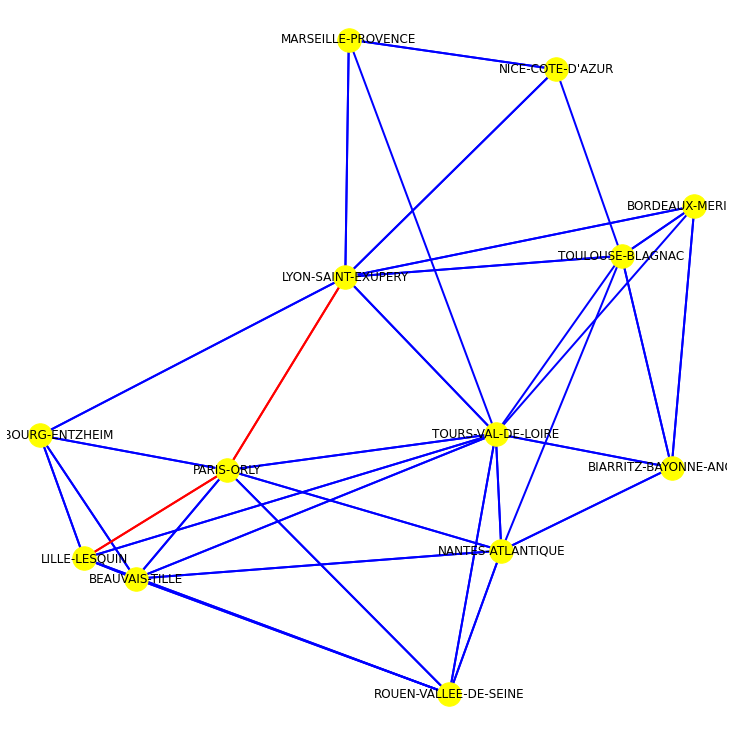

In [ ]:
def generation_graphe(data,data1,data2,data3,aeroport,seuil):
  G = nx.MultiGraph()
  for v in aeroport:
      G.add_node(v)
  seuil_float = float(seuil)    
  j = 0
  for v in aeroport:
    j = 0
    for u in aeroport:
        #if (u!=v) :
          if ((u=="MARSEILLE-PROVENCE" and v == "TOULOUSE-BLAGNAC")or(u == "TOULOUSE-BLAGNAC" and v == "MARSEILLE-PROVENCE")):
            break
          if (data2[v][j]<seuil_float and data2[v][j]!=0):
            #print(data2[v][j])
            VarAvion=data[v][j] 
            G.add_weighted_edges_from([(v, u, VarAvion)])
          if (data3[v][j]<seuil_float and data3[v][j]!=0) :
            print(data2[v][j])
            VarVoiture=data1[v][j] 
            G.add_weighted_edges_from([(v, u, VarVoiture)])
          j=j+1
           
  return G
  

seuil = input("Veuillez saisir un seuil : ")

seuil_float = float(seuil)

G = generation_graphe(DatAvion, DatVehicule,DatDistanceAvion, DatDistanceVehicule, aeroport,seuil_float)

options = {
    'node_color': 'var_transfertellow',
    'node_size': 550,
    'edge_color': 'tab:gravar_transfert',
    'with_labels': True,
    'width': 2,
}

for v in aeroport :
  print(v)

debut = input("Veuillez saisir Laeroport de depart: ")


fin = input("Veuillez saisir Laeroport d'arriver: ")


algo = (nx.shortest_path(G, source= debut, target=fin, method='dijkstra'))
couleurs_arcs =['blue']*G.number_of_edges()


var_transfert =0

while (var_transfert < len(algo)-1):
    for v in enumerate(G.edges):
        # z, j= v[1]

        z,j,x = v[1]
        #print(v[1])
        if ((z==algo[var_transfert])and (j==algo[var_transfert+1]))or ((z==algo[var_transfert+1]) and (j==algo[var_transfert])):
          couleurs_arcs[v[0]]= "red"

    var_transfert=var_transfert+1
options = {
    'node_color': 'Yellow',
    'node_size': 550,
    'edge_color': couleurs_arcs,
    'with_labels': True,
    'width': 2,
}
print(len(algo))
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G,k=0.1)
nx.draw(G, pos, **options)
plt.show()

# Affichage du resultat



In [ ]:
def Convertisseur(fin):
  if (fin == "BEAUVAIS-TILLE"):
    return 0
  elif (fin == "BIARRITZ-BAYONNE-ANGLET" ):
    return 1
  elif (fin == "BORDEAUX-MERIGNAC"):
    return 2
  elif (fin == "LILLE-LESQUIN"):
    return 3
  elif (fin == "LYON-SAINT-EXUPERY"):
    return 4
  elif (fin == "MARSEILLE-PROVENCE"):
    return 5
  elif (fin == "NANTES-ATLANTIQUE"):
    return 6  
  elif (fin == "NICE-COTE-D'AZUR"):
    return 7
  elif (fin == "PARIS-ORLY"):
    return 8
  elif (fin == "ROUEN-VALLEE-DE-SEINE"):
    return 9
  elif (fin == "STRASBOURG-ENTZHEIM"):
    return 10
  elif (fin == "TOULOUSE-BLAGNAC"):
    return 11
  elif (fin == "TOURS-VAL-DE-LOIRE"):
    return 12


In [ ]:
print(nx.shortest_path(G, source=debut, target=fin,method='dijkstra'))
i=0
while (i<len(algo)-1):
  if (DatAvion[algo[i]][Convertisseur(algo[i+1])]>DatVehicule[algo[i]][Convertisseur(algo[i+1])] and DatDistanceVehicule[algo[i]][Convertisseur(algo[i+1])]<seuil_float):
    print('De '+ algo[i] +' à '+ algo[i+1] +' il faut prendre la voiture')
    
    
  else :
    print('De '+algo[i]+' à '+ algo[i+1]+' il faut prendre l avion')
  i=i+1

['LILLE-LESQUIN', 'PARIS-ORLY', 'LYON-SAINT-EXUPERY']
De LILLE-LESQUIN à PARIS-ORLY il faut prendre l avion
De PARIS-ORLY à LYON-SAINT-EXUPERY il faut prendre l avion
